# opening the webcam


so we can start by 

```
pip install cv2
pip install mediapipe as mp 
```
 
to install the package of cv2 and mediapipe 


In [ ]:
import cv2
import mediapipe as mp
import time

<font size =  2 > with this code we can now use any method we need from this package. So lets start with turning on our webcam with open cv to do so, we use this code

In [ ]:
# define a video capture object
vid = cv2.VideoCapture(0)
  
while(True):
      
    # Capture the video frame
    # by frame
    working, cam = vid.read()
  
    # Display the resulting cam
    cv2.imshow(cam)
      
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()

# Welcome to AI Whiteboard Project

 hello everyone Richard here, this notbook is meant to explain in detail how to do this project and why i did it, this meant as an essay and a documentation on the project.



> Main Reason I Did This Project


me, i feel like teaching and learning has been impacted severely due to the lack of using whiteboard. Using Powerpoint is good but still somewhat lacking in impact, thats why i want to try to make it. 


> Requirements needed for this project


 some thing we need to have before we start : 


*   <font size = 3>Phyton and all its dependencies
*   <font size = 3>openCV
*   <font size = 3>mediaPipe

 we can install openCV and mediaPipe package by
```
pip install cv2
pip install mediapipe as mp
```
  **OpenCV** library used for computer vision applications. With help of OpenCV, we can build an enormous number of applications that work better in real-time. Mainly it is used for image and video processing.

 **MediaPipe** is a framework mainly used for building audio, video, or any time series data. With the help of the MediaPipe framework, we can build very impressive pipelines for different media processing functions.



> MediaPipe Hand Landmark


  Basically, the MediaPipe uses a single-shot palm detection model and once that is done it performs precise key point localization of 21 3D palm coordinates in the detected hand region.

 The MediaPipe pipeline utilizes multiple models like, a palm detection model that returns an oriented hand bounding box from the full image. The cropped image region is fed to a hand landmark model defined by the palm detector and returns high-fidelity 3D hand key points.



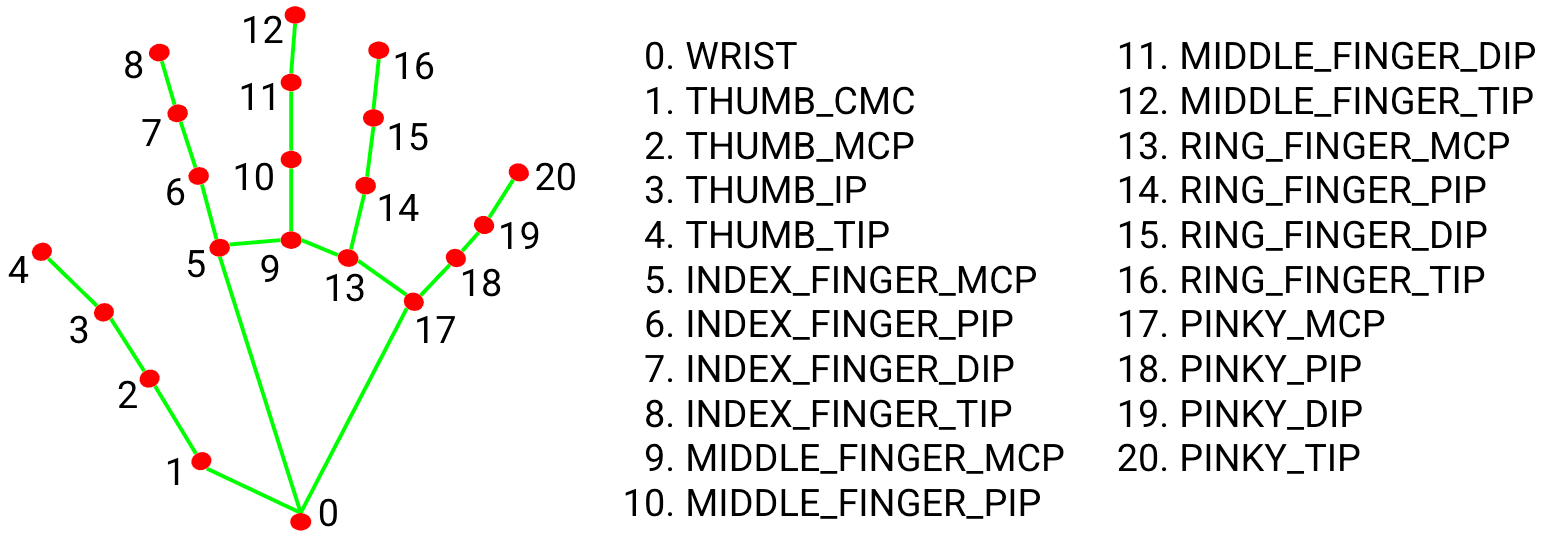












 as Jupyter does not support cv2.imshow, i wont be running the code, but you can still follow along in regular phyton 

 now we are going to use the mediaPipe to apply the hand tracking from mediaPipe

In [ ]:

cam = cv2.VideoCapture(0)

#In the above piece of code, we declare an object called “hands” from mp.solutions.hand to detect 
#the hands, in default, if you look inside the class “Hands()“, And we will use mpDraw to draw the key points.

mpHands = mp.solutions.hands
hands = mpHands.Hands()
mpDraw = mp.solutions.drawing_utils

while True:
    working, cam = vid.read()
    
    #we manipulate the colour of our "hand from BGR to RGB for the mediapipe to process
    imgRGB = cv2.cvtColor(cam, cv2.COLOR_BGR2RGB)
    
    

    cv2.imshow("Test", cam)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  

vid.release()
cv2.destroyAllWindows()

 now we added the MP hand and draw tool to get ready, for the next phase

In [ ]:
while True:
    working, cam = vid.read()
    imgRGB = cv2.cvtColor(cam, cv2.COLOR_BGR2RGB)
    
    
    results = hands.process(imgRGB)
    #print(results.multi_hand_landmarks)
    
    
    if results.multi_hand_landmarks:
        for handLms in results.multi_hand_landmarks:
            for id, lm in enumerate(handLms.landmark):
                #print(id,lm)
                h, w, c = img.shape
                cx, cy = int(lm.x *w), int(lm.y*h)
                if(id == 4 or id == 8 or id == 12 or id == 16 or id == 20):
                  cv2.circle(cam, (cx,cy), 3, (255,0,255), cv2.FILLED)

            mpDraw.draw_landmarks(cam, handLms, mpHands.HAND_CONNECTIONS)

    cv2.imshow("Test", cam)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  

vid.release()
cv2.destroyAllWindows()

 Here in the above code, we read the frames from the webcam and convert the image to RGB. Then we detect hands in the frame with the help of “hands.process()”  function. Once the hands get detected we will locate the key points and then we highlight the dots in the keypoints using cv2.circle, and connect the key points using mpDraw.draw_landmarks.

<font size =  2> now whats left is to make it as a module that we can use for our peojects, this will be our core module.

In [ ]:
import cv2
import mediapipe as mp
import time
from mediapipe.framework.formats.landmark_pb2 import LandmarkList

from mediapipe.python.solutions.drawing_utils import draw_landmarks

class handDetect():
    def __init__(self,mode = False,maxHands = 2, detectConf = 0.6534, trackConf = 0.69541) :
        self.mode = mode
        self.maxHands = maxHands
        self.minDetectConf = detectConf
        self.minTrackConf = trackConf

        #prepare hand model 
        self.mpHands =  mp.solutions.hands
        self.hand =  self.mpHands.Hands(self.mode,self.maxHands,
                                        self.minDetectConf,self.minTrackConf)
        #prepare to draw
        self.mpDraw =  mp.solutions.drawing_utils

    def lookForHands(self,cam,draw = True):
        self.imgRGB =  cv2.cvtColor(cam,cv2.COLOR_BGR2RGB)
        self.process = self.hand.process(self.imgRGB)
        #print(process.multi_hand_landmarks)

        if(self.process.multi_hand_landmarks):
            for handLms in self.process.multi_hand_landmarks :
                if (draw == True):
                    self.mpDraw = draw_landmarks(cam,handLms,self.mpHands.HAND_CONNECTIONS)

        return cam    

    def lookForPosition(self,cam,handNo = 0, draw = True):
        
        LandmarkList = []
        if self.process.multi_hand_landmarks:
            myHand = self.process.multi_hand_landmarks[handNo]
            for id, lm in enumerate(myHand.landmark):
                #print(id,lm)
                    h, w , c = cam.shape
                    cx, cy = int(lm.x * w), int(lm.y * h)
                    LandmarkList.append([id,cx,cy])
                    
                    if(id == 4 or id == 8 or id == 12 or id == 16 or id == 20 and draw == True):
                        cv2.circle(cam, (cx,cy), 10, (255,0,255), cv2.FILLED)
    
        return LandmarkList

def main():
   
    vid = cv2.VideoCapture(0)
    detect = handDetect()

    while(True):
        working, cam = vid.read()
        cam = detect.lookForHands(cam)
        LandmarkList = detect.lookForPosition(cam)
        #if len(LandmarkList) != 0:
            #print(LandmarkList[])

        cv2.imshow('openCV', cam)
    
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    vid.release()
    cv2.destroyAllWindows()
        



if __name__ == "__main__":
    main()



 based on the code we did there are 2 method i made to ease our projec, its to look for hand or to look for the hand coordinate. and with that we are done with hand tracking module.

# Drawing and coloring 

 now we are going to use our module created above to create the basic white board 

 in this section there are 5 objective that i want to focus on 


1.   Active Header
2.   Finding and Tracking Hand Landmarks
3.   Check which fingers are up
4.   Selection Mode - Two finger are up
5.   Drawing Mode - Index finger is up

 the method done in this project is not the most effecive and subject to changes, feel free to email me if you have an better idea/ an error while doing this project









> Creating the header 


 so the header can be done in canva or other similar apps, make it simple and easy to understand

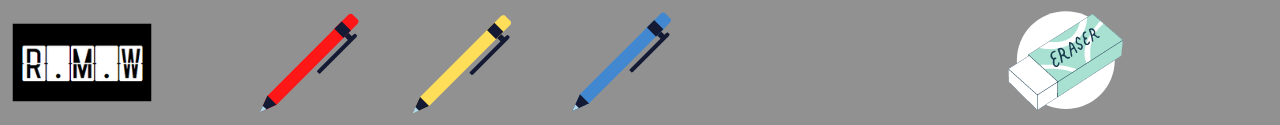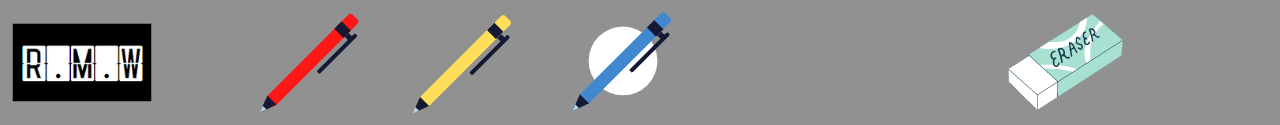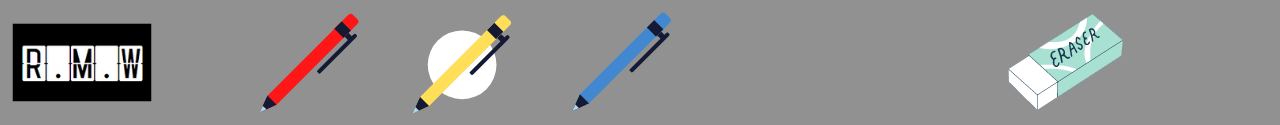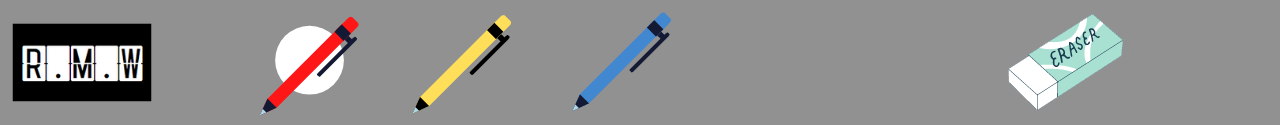



this is the header that i made, feel free to change, there are 3 colour available (red, yellow, blue, and eraser(black)), and for the size, im using 1280*125. 

<font size =2> and now we are gonna make it stay at the top part of our frame.

In [ ]:
import cv2
from mediapipe.framework.formats.landmark_pb2 import LandmarkList
import numpy as np
import os
import HandTrack_Module as HT

folderPath = "header"
myList = os.listdir(folderPath)
print(myList)


headerList = []
for imPath in myList:
    image = cv2.imread(f'{folderPath}/{imPath}')
    headerList.append(image)
print(len(headerList))
header = headerList[0]

cap = cv2.VideoCapture(0)
cap.set(3, 1280)
cap.set(4, 720)

while True:

    # 1. Import image
    success, img = cap.read()
    img = cv2.flip(img, 1)
    img[0:125, 0:1280] = header
    cv2.imshow("Image", img)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()


 this code is to add our header to our display, this while is not functional for now, this will be used to change color, or change to eraser mode.

<font size =  2> now moving on to the next step : finding the hand landmarks for our drawing



In [ ]:
#code for finding the landmark
img = detector.lookForHands(img)
lmList = detector.lookForPosition(img, draw=False)

#to look if there is a finger then...
if len(lmList) != 0:

        # tip of index and middle fingers
        x1, y1 = lmList[8][1:]
        x2, y2 = lmList[12][1:]

        # 3. Check which fingers are up
        fingers = detector.lookForFinger()
        # print(fingers)


  now this is the code we need to add inside the while(true) loop, but we haven't make the look for finger method, so we have to do that first.

 the code is designed to detect index finger tip and middle finger tip, and removing the ID from the array so the data we process was only 

```
(index X, index Y), (middle X, middle Y)
```



In [ ]:
def lookForFinger(self):
        finger = []

        if(self.LandmarkList [self.tipID [0]][1] < self.LandmarkList[self.tipID[0]-1][1]):
            finger.append(1)
        else:
            finger.append(0)

        for id in range(1,5):
            if(self.LandmarkList [self.tipID[id]][2] < self.LandmarkList[self.tipID[id]-2][2]):
                finger.append(1)
            else :
                finger.append(0)
        return finger

<font size =2> this method return base 2 of our finger, if we rise the finger we can get 1 for that finger, and 0 if we fold the finger



In [ ]:
# 4. If Selection Mode - Two finger are up
        if fingers[1] and fingers[2]:
            # xp, yp = 0, 0
            #print("Selection Mode")
            #cracking my head open yes thankyou
            if(y1 < 125):
                if(x1 >= 200 and x1 <= (200+100)):
                    #print("select color : red")
                    Header = headerList[0]
                    drawColor = (52, 64, 235)
                elif(x1 >= 350 and x1 <= (350+100)):
                   # print("Select Colour : yellow")
                    Header = headerList[1]
                    drawColor = (11,195,255)
                elif(x1 >= 500 and x1 <= (500 + 100)):
                    #print("select color : blue")
                    Header = headerList[2]
                    drawColor=(235, 64, 52)
                elif(x1 >= 1000 and x1 <=(1000+100)):
                    #print("erase")
                    activeHeader = headerList[3]
                    drawColor = (0,0,0)
            cv2.rectangle(img, (x1, y1 - 25), (x2, y2 + 25), drawColor, cv2.FILLED)


 now continuing from before, by knowing what finger are currently up/down, we can design a code for the selection mode

we can make it so that if there is 2 finger that are up, then it is safe to say that we want to select not draw 

In [ ]:
# 5. If Drawing Mode - Index finger is up
        if fingers[1] and fingers[2] == False:
            cv2.circle(img, (x1, y1), 15, drawColor, cv2.FILLED)
            #print("Drawing Mode")
            if xp == 0 and yp == 0:
                xp, yp = x1, y1

            cv2.line(img, (xp, yp), (x1, y1), drawColor, brushThickness)
            cv2.line(imgCanvas,(xp,yp), (x1,y1), drawColor,brushThickness)

            if drawColor == (0, 0, 0):
                cv2.line(img, (xp, yp), (x1, y1), drawColor, eraserThickness)
                cv2.line(imgCanvas, (xp, yp), (x1, y1), drawColor, eraserThickness)
            #
            else:
                cv2.line(img, (xp, yp), (x1, y1), drawColor, brushThickness)
                cv2.line(imgCanvas, (xp, yp), (x1, y1), drawColor, brushThickness)

            xp, yp = x1, y1

this is a last minute effort to finish the project, the draw method. we need to have some record of the previous X and the previous Y and this code solve that issue while it is temporarly 
```
if xp == 0 and yp == 0: xp, yp = x1, y1
```
the rest should be easy as we already done all 5 task we set out earlier

# full code



> Hand Module fullcode 



In [ ]:
import cv2
import mediapipe as mp
import time
from mediapipe.framework.formats.landmark_pb2 import LandmarkList

from mediapipe.python.solutions.drawing_utils import draw_landmarks

class handDetect():
    def __init__(self,mode = False,maxHands = 2, detectConf = 0.6534, trackConf = 0.69541) :
        self.mode = mode
        self.maxHands = maxHands
        self.minDetectConf = detectConf
        self.minTrackConf = trackConf

        #prepare hand model 
        self.mpHands =  mp.solutions.hands
        self.hand =  self.mpHands.Hands(self.mode,self.maxHands,
                                        self.minDetectConf,self.minTrackConf)
        #prepare to draw
        self.mpDraw =  mp.solutions.drawing_utils

        self.tipID = [4,8,12,16,20]

    def lookForHands(self,cam,draw = True):
        self.imgRGB =  cv2.cvtColor(cam,cv2.COLOR_BGR2RGB)
        self.process = self.hand.process(self.imgRGB)
        #print(process.multi_hand_landmarks)

        if(self.process.multi_hand_landmarks):
            for handLms in self.process.multi_hand_landmarks :
                if (draw == True):
                    self.mpDraw = draw_landmarks(cam,handLms,self.mpHands.HAND_CONNECTIONS)

        return cam    

    def lookForPosition(self,cam,handNo = 0, draw = True):
        
        self.LandmarkList = []
        if self.process.multi_hand_landmarks:
            myHand = self.process.multi_hand_landmarks[handNo]
            for id, lm in enumerate(myHand.landmark):
                #print(id,lm)
                    h, w , c = cam.shape
                    cx, cy = int(lm.x * w), int(lm.y * h)
                    self.LandmarkList.append([id,cx,cy])
                    
                    if(id == 4 or id == 8 or id == 12 or id == 16 or id == 20 and draw == True):
                        cv2.circle(cam, (cx,cy), 10, (255,0,255), cv2.FILLED)
    
        return self.LandmarkList

    def lookForFinger(self):
        finger = []

        if(self.LandmarkList [self.tipID [0]][1] < self.LandmarkList[self.tipID[0]-1][1]):
            finger.append(1)
        else:
            finger.append(0)

        for id in range(1,5):
            if(self.LandmarkList [self.tipID[id]][2] < self.LandmarkList[self.tipID[id]-2][2]):
                finger.append(1)
            else :
                finger.append(0)
        return finger

def main():
    pastTime = 0
    currentTime = 0
    vid = cv2.VideoCapture(0)
    detect = handDetect()

    while(True):
        working, cam = vid.read()
        cam = detect.lookForHands(cam)
        LandmarkList = detect.lookForPosition(cam)
        #if len(LandmarkList) != 0:
            #print(LandmarkList[])

        currentTime = time.time()
        fps = 1/(currentTime - pastTime)
        pastTime = currentTime

        cv2.putText(cam,str(int(fps)),(50,50),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2,cv2.LINE_AA)
        cv2.imshow('openCV', cam)
    
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    vid.release()
    cv2.destroyAllWindows()
        



if __name__ == "__main__":
    main()





> white board module 



In [ ]:
import cv2
from mediapipe.framework.formats.landmark_pb2 import LandmarkList
import numpy as np
import os
import HandTrack_Module as HT
#######################
brushThickness = 15
eraserThickness = 100
########################


folderPath = "header"
myList = os.listdir(folderPath)
print(myList)


headerList = []
for imPath in myList:
    image = cv2.imread(f'{folderPath}/{imPath}')
    headerList.append(image)
print(len(headerList))
header = headerList[0]

drawColor = (255, 0, 255)

cap = cv2.VideoCapture(0)
cap.set(3, 1280)
cap.set(4, 720)

detector = HT.handDetect(detectConf=0.75,maxHands=1)
xp, yp = 0, 0
imgCanvas = np.zeros((720, 1280, 3), np.uint8)

while True:

    # 1. Import image
    success, img = cap.read()
    img = cv2.flip(img, 1)

    # 2. Find Hand Landmarks
    img = detector.lookForHands(img)
    lmList = detector.lookForPosition(img, draw=False)

    if len(lmList) != 0:

        # print(lmList)

        # tip of index and middle fingers
        x1, y1 = lmList[8][1:]
        x2, y2 = lmList[12][1:]

        # 3. Check which fingers are up
        fingers = detector.lookForFinger()
        # print(fingers)

        # 4. If Selection Mode - Two finger are up
        if fingers[1] and fingers[2]:
            # xp, yp = 0, 0
            #print("Selection Mode")
            #cracking my head open yes thankyou
            if(y1 < 125):
                if(x1 >= 200 and x1 <= (200+100)):
                    #print("select color : red")
                    Header = headerList[0]
                    drawColor = (52, 64, 235)
                elif(x1 >= 350 and x1 <= (350+100)):
                   # print("Select Colour : yellow")
                    Header = headerList[1]
                    drawColor = (11,195,255)
                elif(x1 >= 500 and x1 <= (500 + 100)):
                    #print("select color : blue")
                    Header = headerList[2]
                    drawColor=(235, 64, 52)
                elif(x1 >= 1000 and x1 <=(1000+100)):
                    #print("erase")
                    activeHeader = headerList[3]
                    drawColor = (0,0,0)
            cv2.rectangle(img, (x1, y1 - 25), (x2, y2 + 25), drawColor, cv2.FILLED)

        # 5. If Drawing Mode - Index finger is up
        if fingers[1] and fingers[2] == False:
            cv2.circle(img, (x1, y1), 15, drawColor, cv2.FILLED)
            #print("Drawing Mode")
            if xp == 0 and yp == 0:
                xp, yp = x1, y1

            cv2.line(img, (xp, yp), (x1, y1), drawColor, brushThickness)
            cv2.line(imgCanvas,(xp,yp), (x1,y1), drawColor,brushThickness)

            if drawColor == (0, 0, 0):
                cv2.line(img, (xp, yp), (x1, y1), drawColor, eraserThickness)
                cv2.line(imgCanvas, (xp, yp), (x1, y1), drawColor, eraserThickness)
            #
            else:
                cv2.line(img, (xp, yp), (x1, y1), drawColor, brushThickness)
                cv2.line(imgCanvas, (xp, yp), (x1, y1), drawColor, brushThickness)

            xp, yp = x1, y1


        # # Clear Canvas when all fingers are up
        #if all (x >= 1 for x in fingers):
                #imgCanvas = np.zeros((720, 1280, 3), np.uint8)

    imgGray = cv2.cvtColor(imgCanvas, cv2.COLOR_BGR2GRAY)
    _, imgInv = cv2.threshold(imgGray, 50, 255, cv2.THRESH_BINARY_INV)
    imgInv = cv2.cvtColor(imgInv,cv2.COLOR_GRAY2BGR)
    img = cv2.bitwise_and(img,imgInv)
    img = cv2.bitwise_or(img,imgCanvas)


    # Setting the header image
    img[0:125, 0:1280] = header
    # img = cv2.addWeighted(img,0.5,imgCanvas,0.5,0)
    cv2.imshow("Image", img)
    #cv2.imshow("Canvas", imgCanvas)
    #cv2.imshow("Inv", imgInv)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

# documentation picture

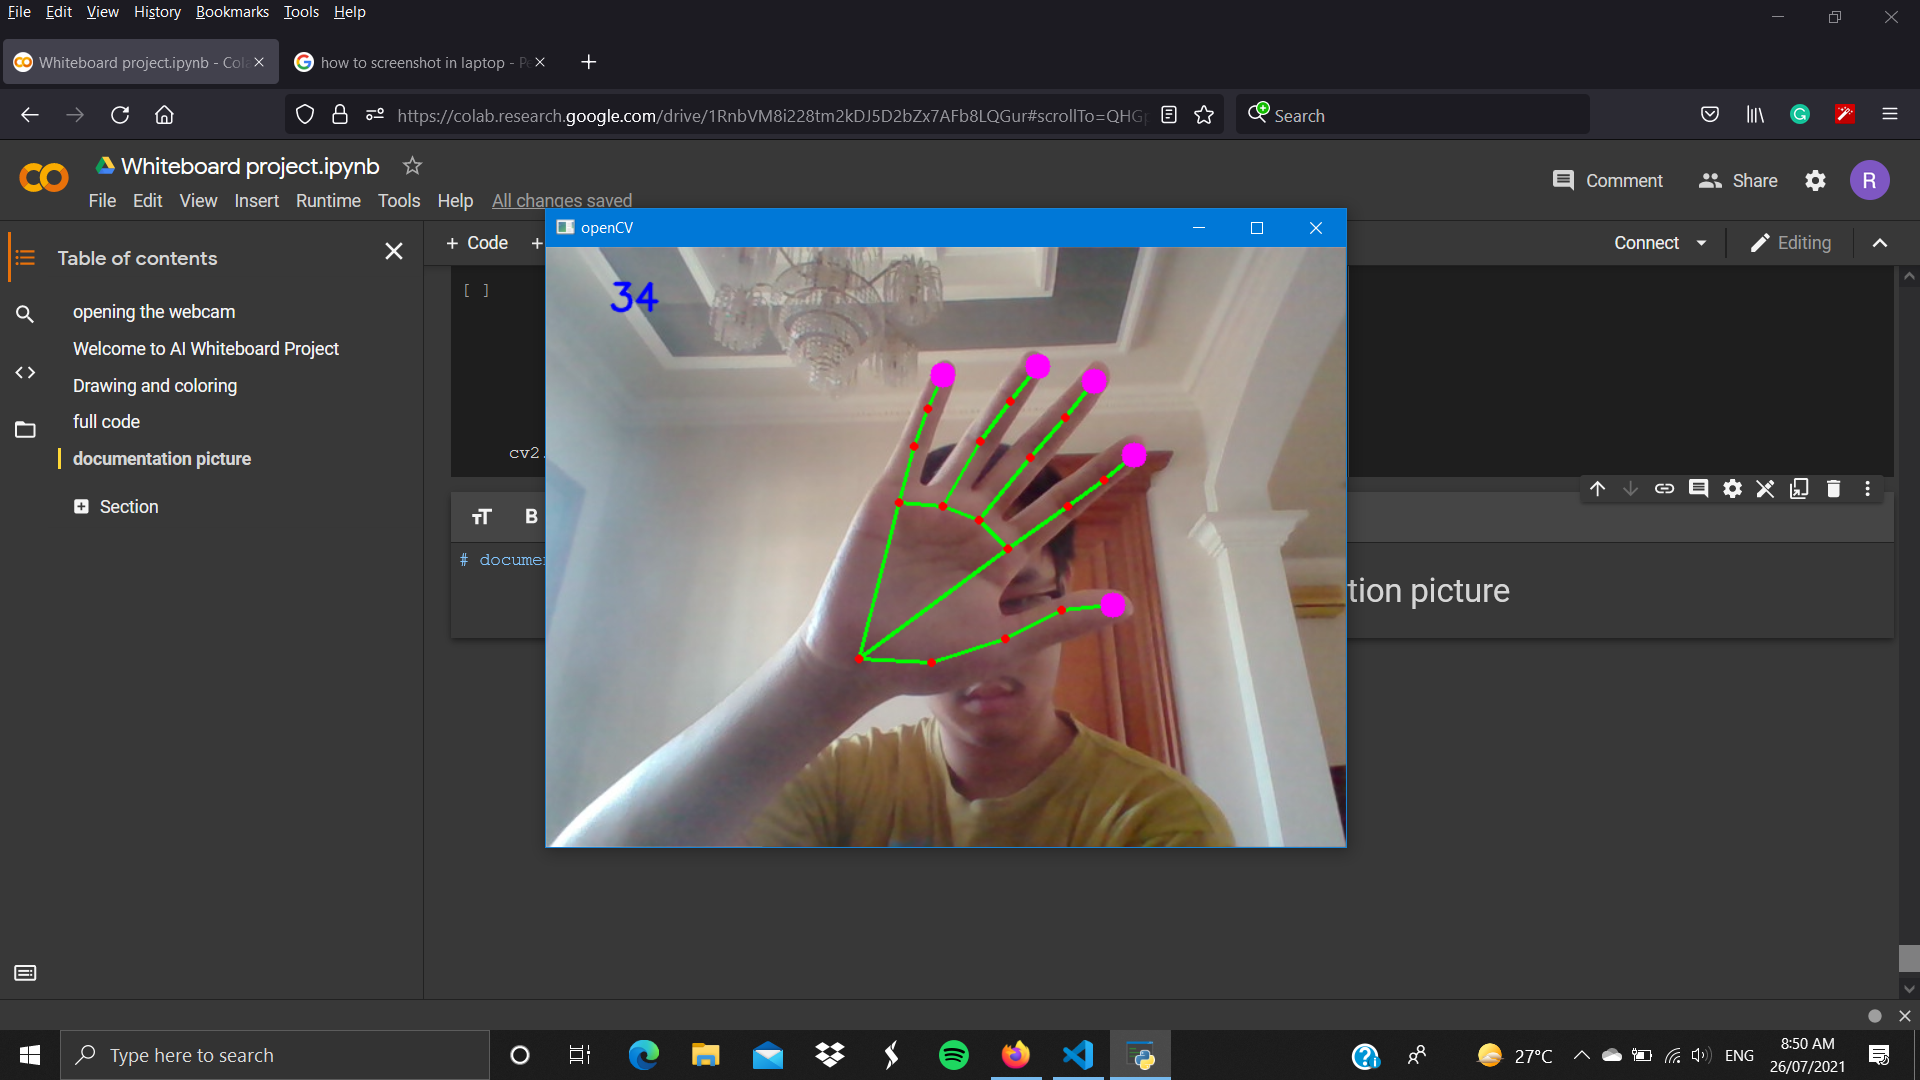

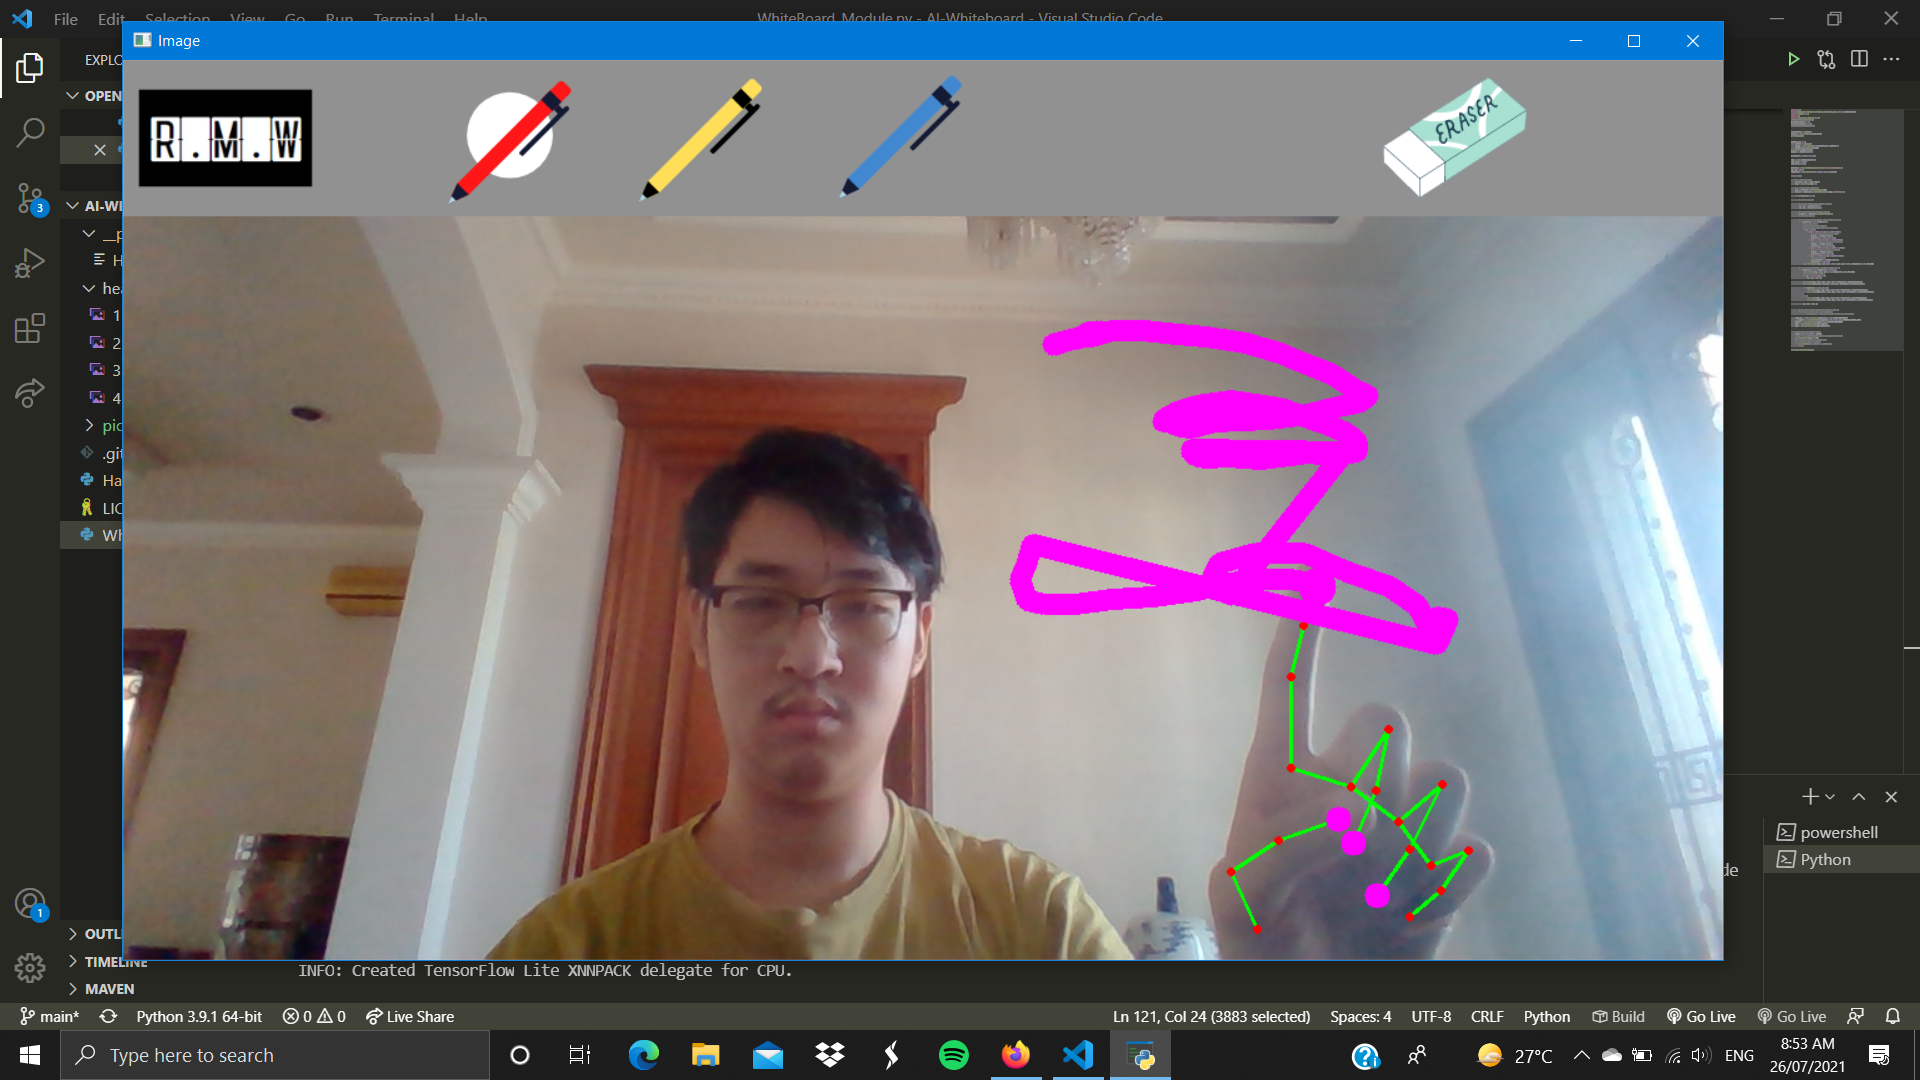

# Contact :

thanks for reading / following this scuffed tutorial,
feel free to update me with bad code/improvement

while this is not perfect, there is some aspect that i wish to develop more : 

such as more precission with the drawing as it is unusable to draw because of its inaccuracy, and maybe changable brush width, and a function to add a picture from the file to it 

contact me at :
https://richardwibowo.github.io/

or email me at :
Richardwibowo@hotmail.com